### Import

In [3]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import random
import matplotlib.image as mpimg
from glob import glob
import cv2
import numpy as np
import hashlib
from collections import defaultdict


### Load Dataset

In [4]:
# 데이터 경로
DATA_DIR = './data/train'

# 클래스 목록 가져오기
class_dirs = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print(f"클래스 목록: {class_dirs}")
print(len(class_dirs), "클래스")

# 클래스별 이미지 경로 수집
data = []
for cls in class_dirs:
    cls_dir = os.path.join(DATA_DIR, cls)
    for img_name in os.listdir(cls_dir):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(cls_dir, img_name)
            img_path = os.path.normpath(img_path)  # 경로 정규화
            data.append({
                'class': cls,
                'img_path': img_path
            })

df = pd.DataFrame(data)

클래스 목록: ['1시리즈_F20_2013_2015', '1시리즈_F20_2016_2019', '1시리즈_F40_2020_2024', '2008_2015_2017', '2시리즈_그란쿠페_F44_2020_2024', '2시리즈_액티브_투어러_F45_2019_2021', '2시리즈_액티브_투어러_U06_2022_2024', '3008_2세대_2018_2023', '3시리즈_E90_2005_2012', '3시리즈_F30_2013_2018', '3시리즈_G20_2019_2022', '3시리즈_G20_2023_2025', '3시리즈_GT_F34_2014_2021', '4시리즈_F32_2014_2020', '4시리즈_G22_2021_2023', '4시리즈_G22_2024_2025', '5008_2세대_2018_2019', '5008_2세대_2021_2024', '5시리즈_F10_2010_2016', '5시리즈_G30_2017_2023', '5시리즈_G60_2024_2025', '5시리즈_GT_F07_2010_2017', '6시리즈_F12_2011_2018', '6시리즈_GT_G32_2018_2020', '6시리즈_GT_G32_2021_2024', '718_박스터_2017_2024', '718_카이맨_2017_2024', '7시리즈_F01_2009_2015', '7시리즈_G11_2016_2018', '7시리즈_G11_2019_2022', '7시리즈_G70_2023_2025', '8시리즈_G15_2020_2024', '911_2003_2019', '911_992_2020_2024', 'A4_B9_2016_2019', 'A4_B9_2020_2024', 'A5_F5_2019_2024', 'A6_C8_2019_2025', 'A7_2012_2016', 'A7_4K_2020_2024', 'A8_D5_2018_2023', 'All_New_XJ_2016_2019', 'AMG_GT_2016_2024', 'A_클래스_W176_2015_2018', 'A_클래스_W177_2020_2025', 

### 클래스별 이미지 수 시각화

C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1690146883.py:13: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1690146883.py:13: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1690146883.py:13: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1690146883.py:13: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1690146883.py:13: UserWarning: Glyph 46976 (\N{HANGUL SYLLABLE RAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1690146883.py:13: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from f

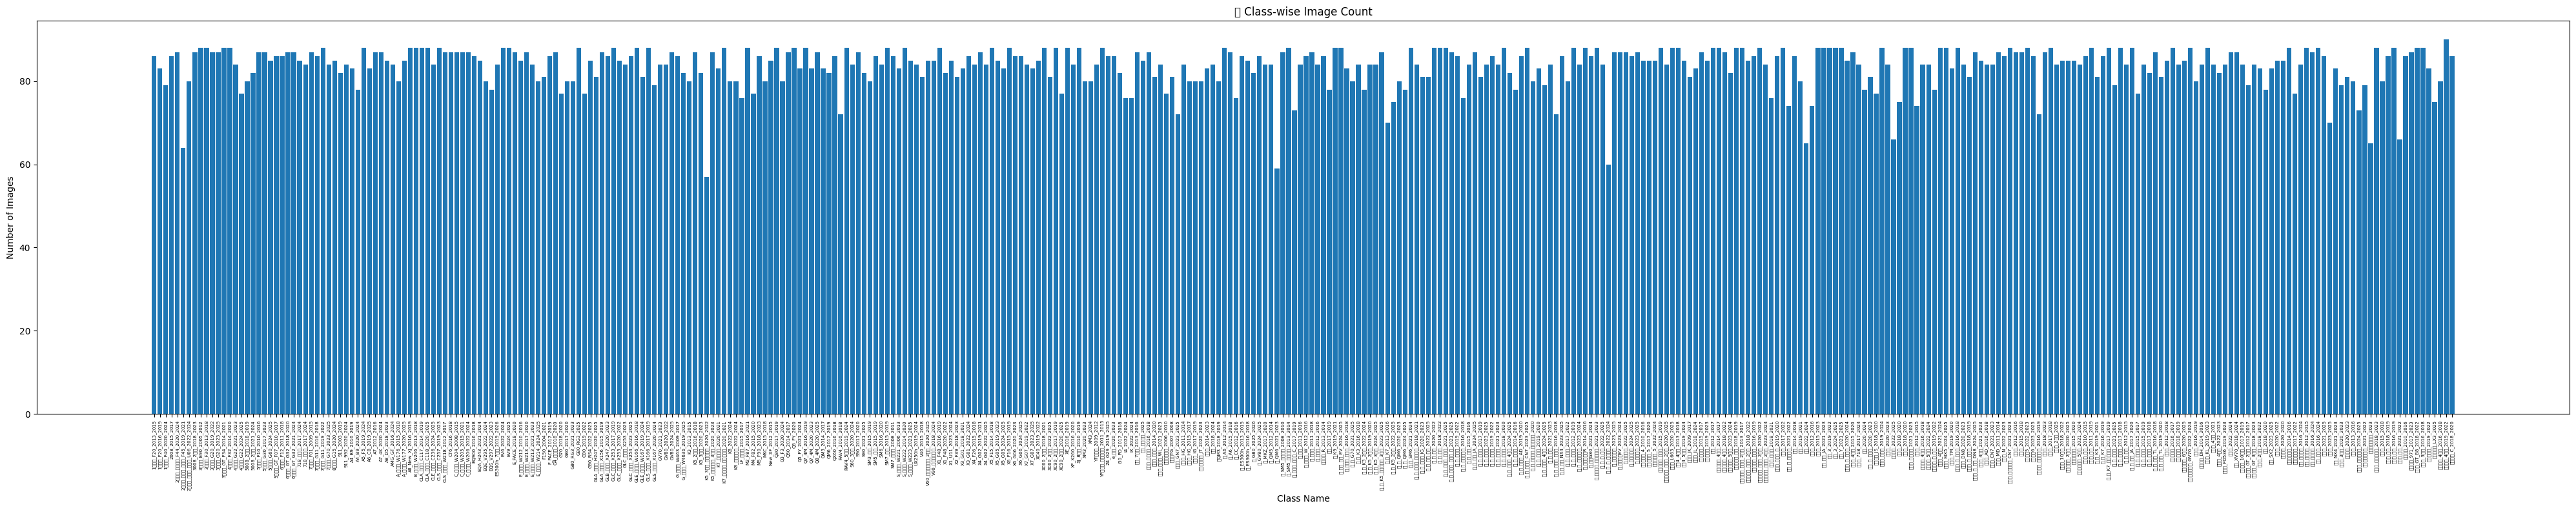

In [5]:
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts().sort_index()
class_names = class_counts.index.tolist()
image_counts = class_counts.values

plt.figure(figsize=(40, 8))
plt.bar(class_names, image_counts)
plt.title("📊 Class-wise Image Count")
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.show()

### 클래스별 이미지 수 출력 + 비정상 폴더 감지

In [6]:
for i, cls in enumerate(sorted(class_dirs)):
    cls_path = os.path.join(DATA_DIR, cls)
    if not os.path.isdir(cls_path):
        print(f"❌ '{cls}'는 폴더가 아님 (무시 또는 삭제 필요)")
    else:
        num_images = df[df['class'] == cls].shape[0]
        print(f"[{i}] {cls} → 이미지 수: {num_images}")


[0] 1시리즈_F20_2013_2015 → 이미지 수: 86
[1] 1시리즈_F20_2016_2019 → 이미지 수: 83
[2] 1시리즈_F40_2020_2024 → 이미지 수: 79
[3] 2008_2015_2017 → 이미지 수: 86
[4] 2시리즈_그란쿠페_F44_2020_2024 → 이미지 수: 87
[5] 2시리즈_액티브_투어러_F45_2019_2021 → 이미지 수: 64
[6] 2시리즈_액티브_투어러_U06_2022_2024 → 이미지 수: 80
[7] 3008_2세대_2018_2023 → 이미지 수: 87
[8] 3시리즈_E90_2005_2012 → 이미지 수: 88
[9] 3시리즈_F30_2013_2018 → 이미지 수: 88
[10] 3시리즈_G20_2019_2022 → 이미지 수: 87
[11] 3시리즈_G20_2023_2025 → 이미지 수: 87
[12] 3시리즈_GT_F34_2014_2021 → 이미지 수: 88
[13] 4시리즈_F32_2014_2020 → 이미지 수: 88
[14] 4시리즈_G22_2021_2023 → 이미지 수: 84
[15] 4시리즈_G22_2024_2025 → 이미지 수: 77
[16] 5008_2세대_2018_2019 → 이미지 수: 80
[17] 5008_2세대_2021_2024 → 이미지 수: 82
[18] 5시리즈_F10_2010_2016 → 이미지 수: 87
[19] 5시리즈_G30_2017_2023 → 이미지 수: 87
[20] 5시리즈_G60_2024_2025 → 이미지 수: 85
[21] 5시리즈_GT_F07_2010_2017 → 이미지 수: 86
[22] 6시리즈_F12_2011_2018 → 이미지 수: 86
[23] 6시리즈_GT_G32_2018_2020 → 이미지 수: 87
[24] 6시리즈_GT_G32_2021_2024 → 이미지 수: 87
[25] 718_박스터_2017_2024 → 이미지 수: 85
[26] 718_카이맨_2017_2024 → 이미지 수: 84
[27] 7시리즈_F

### 손상된 이미지 탐지

In [7]:
from PIL import Image

broken_images = []

for _, row in df.iterrows():
    img_path = row['img_path']
    try:
        with Image.open(img_path) as img:
            img.verify()  # 파일이 열리는지만 체크
    except Exception as e:
        print(f"❌ 오류 이미지: {img_path} — {e}")
        broken_images.append(img_path)


### 이미지 해상도 분포 시각화

c:\Users\danyo\miniconda3\envs\hecto\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


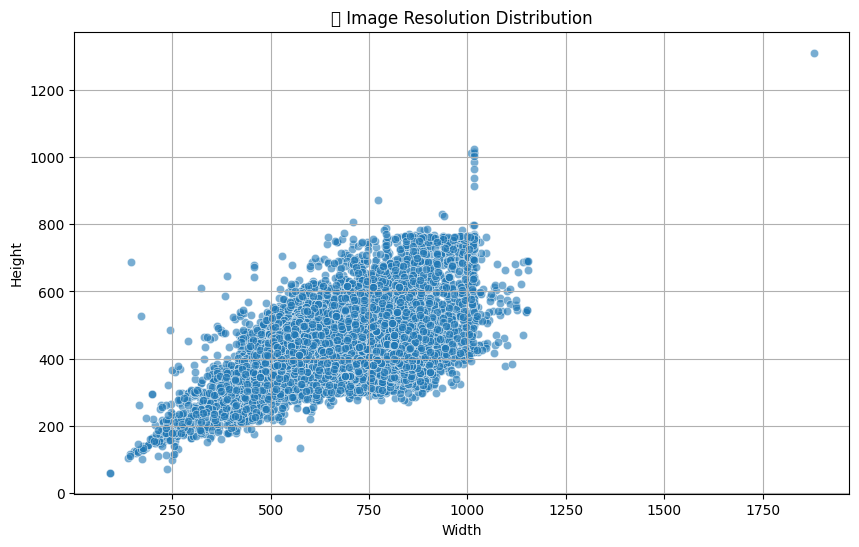

In [8]:
import seaborn as sns

dims = []

for path in df['img_path']:
    try:
        with Image.open(path) as img:
            dims.append(img.size)  # (width, height)
    except:
        continue

dim_df = pd.DataFrame(dims, columns=['width', 'height'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='width', y='height', data=dim_df, alpha=0.6)
plt.title("🖼️ Image Resolution Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(True)
plt.show()


### 종횡비 분포 시각화

c:\Users\danyo\miniconda3\envs\hecto\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


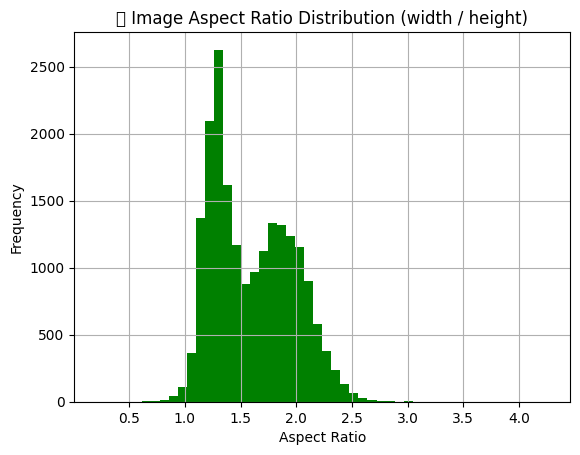

In [9]:
sample_per_class = 50
ratios = []

for cls in class_dirs:
    cls_df = df[df['class'] == cls]
    sample_df = cls_df.sample(min(sample_per_class, len(cls_df)), random_state=42)

    for img_path in sample_df['img_path']:
        try:
            with Image.open(img_path) as img:
                w, h = img.size
                ratios.append(w / h)
        except:
            continue

plt.hist(ratios, bins=50, color='green')
plt.title("📐 Image Aspect Ratio Distribution (width / height)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### 밝기 분포 시각화

c:\Users\danyo\miniconda3\envs\hecto\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129475 (\N{BEVERAGE BOX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


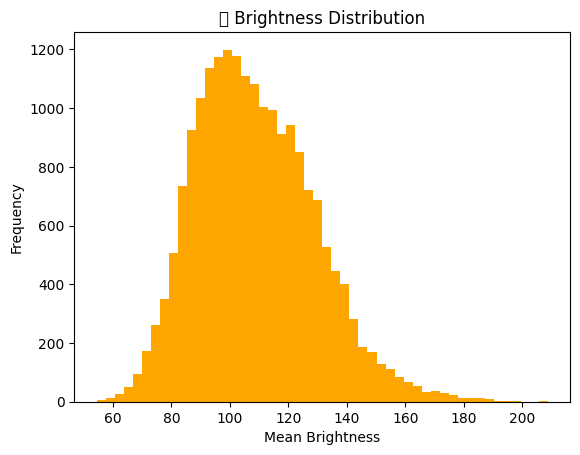

In [10]:
sample_per_class = 50
brightness_list = []

for cls in df['class'].unique():
    sample_df = df[df['class'] == cls].sample(min(sample_per_class, len(df[df['class'] == cls])), random_state=42)
    for img_path in sample_df['img_path']:
        img = Image.open(img_path).convert('L')  # 흑백
        img_np = np.array(img)
        mean_brightness = img_np.mean()
        brightness_list.append(mean_brightness)

plt.hist(brightness_list, bins=50, color='orange')
plt.title('🧃 Brightness Distribution')
plt.xlabel('Mean Brightness')
plt.ylabel('Frequency')
plt.show()


### 블러 정도 분포

c:\Users\danyo\miniconda3\envs\hecto\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


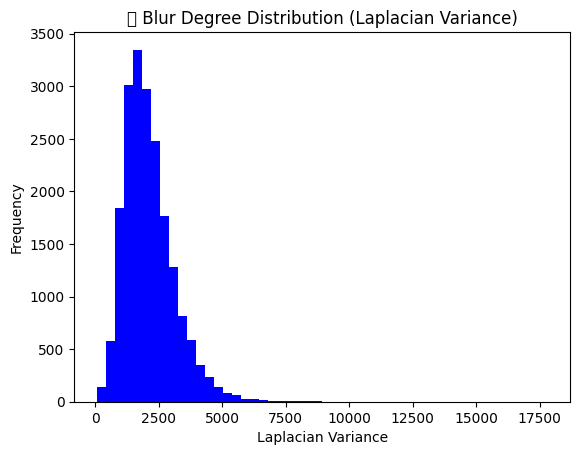

In [11]:
sample_per_class = 50
blur_vals = []

for cls in df['class'].unique():
    sample_df = df[df['class'] == cls].sample(min(sample_per_class, len(df[df['class'] == cls])), random_state=42)
    for img_path in sample_df['img_path']:
        img = Image.open(img_path).convert('L')
        img_np = np.array(img)
        lap = cv2.Laplacian(img_np, cv2.CV_64F)
        var_lap = lap.var()
        blur_vals.append(var_lap)

plt.hist(blur_vals, bins=50, color='blue')
plt.title('💤 Blur Degree Distribution (Laplacian Variance)')
plt.xlabel('Laplacian Variance')
plt.ylabel('Frequency')
plt.show()


### 중복 이미지 탐지 (MD5 해시 기반)

In [12]:
from collections import defaultdict
import hashlib

hash_to_paths = defaultdict(list)

for img_path in df['img_path']:
    with open(img_path, 'rb') as f:
        img_hash = hashlib.md5(f.read()).hexdigest()
    hash_to_paths[img_hash].append(img_path)

duplicates = {h: paths for h, paths in hash_to_paths.items() if len(paths) > 1}

print(f"🔁 총 중복 해시 개수: {len(duplicates)}")
for h, paths in duplicates.items():
    print(f"해시: {h}, 중복 개수: {len(paths)}")
    for p in paths:
        print(f" - {p}")
    print()


🔁 총 중복 해시 개수: 1637
해시: 0bfc3a7f62dc6ecc3e48a208fd0ee75f, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0006.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0068.jpg

해시: 6fb3733c2ad3e6327b0644f7090a9755, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0014.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0035.jpg

해시: eb412e4a61533f3cbfca39d4b45efa20, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0017.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0060.jpg

해시: 5ad14ad28281bb95cb9579801063f9c3, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0040.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0075.jpg

해시: fb65f4b1ec92397bd8a41b0cd316ebe3, 중복 개수: 2
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0041.jpg
 - data\train\1시리즈_F20_2016_2019\1시리즈_F20_2016_2019_0076.jpg

해시: 4730b8104c24c4810cd20229ec149aaf, 중복 개수: 2
 - data\train\1시리즈_F40_2020_2024\1시리즈_F40_2020_2024_0035.jpg
 - data\train\1시리즈_F40_

### 클래스별 이미지 시각화

C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1166963945.py:28: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1166963945.py:28: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1166963945.py:28: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1166963945.py:28: UserWarning: Glyph 50616 (\N{HANGUL SYLLABLE EON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1166963945.py:28: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danyo\AppData\Local\Temp\ipykernel_13128\1166963945.py:28: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from 

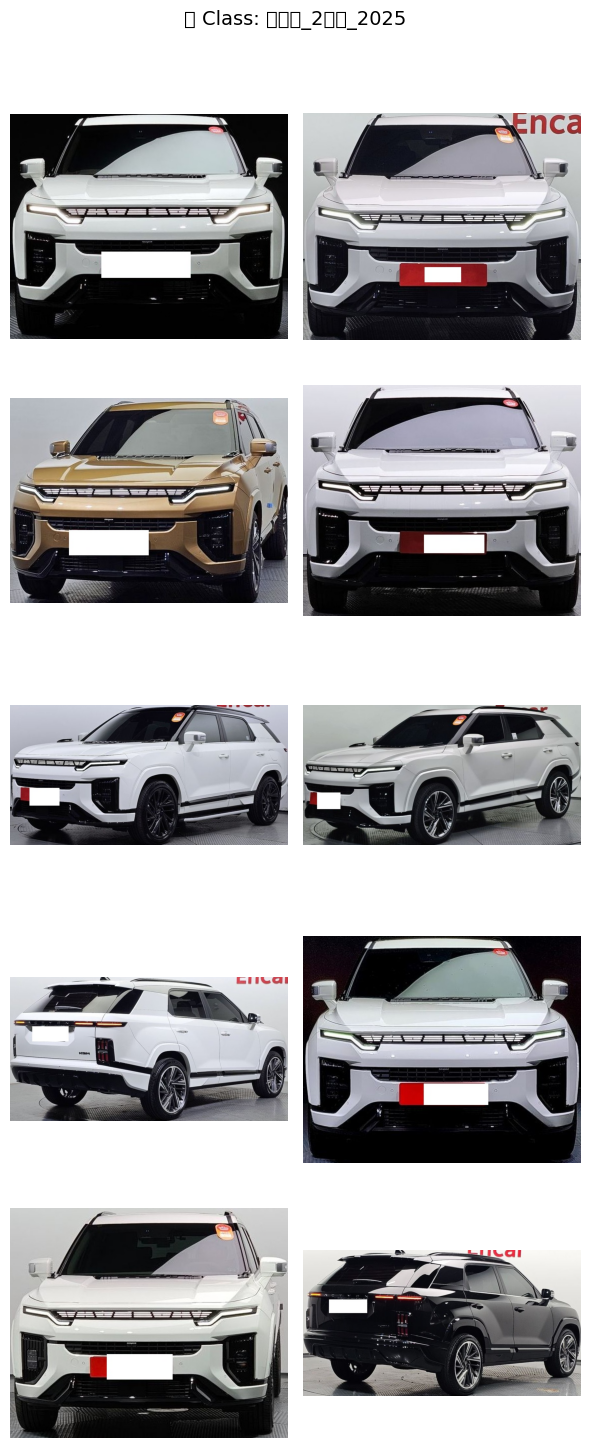

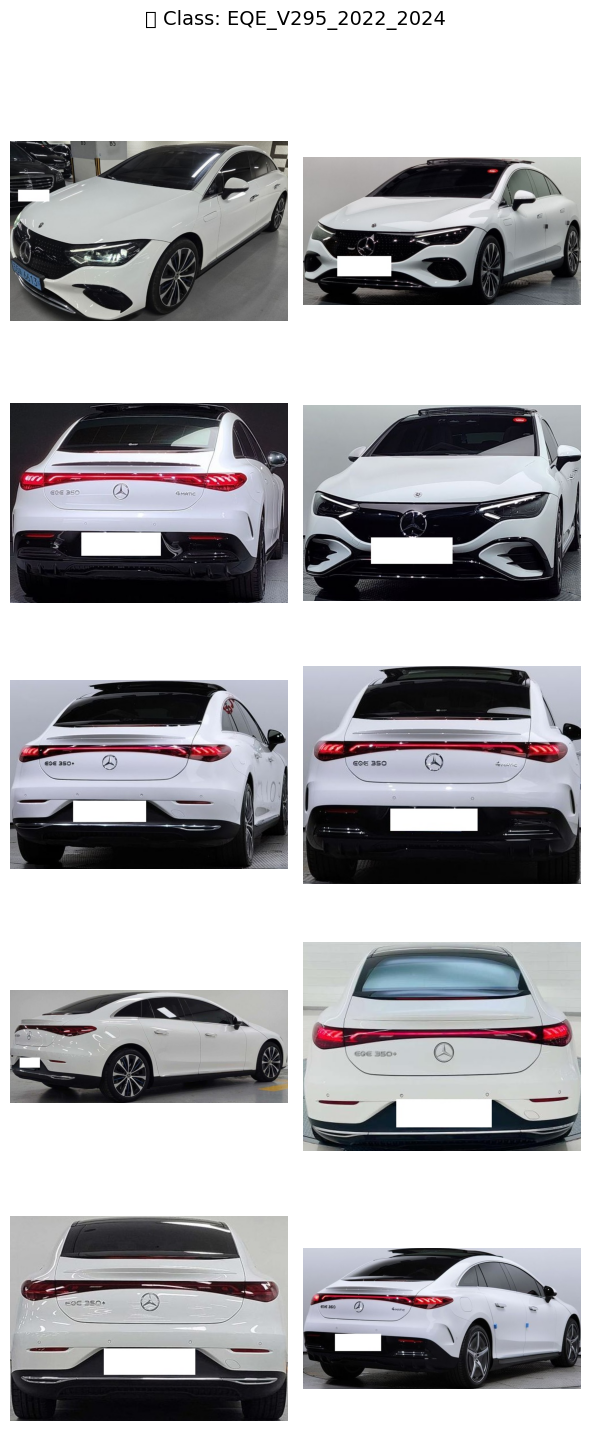

In [16]:
import matplotlib.image as mpimg

NUM_IMAGES_PER_CLASS = 10
NUM_CLASSES_TO_DISPLAY = 2
IMAGES_PER_ROW = 2
IMAGES_PER_COL = NUM_IMAGES_PER_CLASS // IMAGES_PER_ROW

# 랜덤 시드 고정 (재현 가능성 확보)
random.seed(42)

selected_classes = random.sample(list(df['class'].unique()), NUM_CLASSES_TO_DISPLAY)

for class_name in selected_classes:
    image_paths = df[df['class'] == class_name]['img_path'].tolist()
    selected_images = random.sample(image_paths, min(NUM_IMAGES_PER_CLASS, len(image_paths)))

    fig, axes = plt.subplots(IMAGES_PER_COL, IMAGES_PER_ROW, figsize=(6, 15))
    fig.suptitle(f'🖼️ Class: {class_name}', fontsize=14)

    for idx, img_path in enumerate(selected_images):
        row = idx % IMAGES_PER_COL
        col = idx // IMAGES_PER_COL
        ax = axes[row, col]
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
